<a href="https://colab.research.google.com/github/HwayoungYoon/Data-Analysis-Practice/blob/master/kaggle-survey-2017/kaggle_DS_FAQ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[부스트코스] 캐글 실습으로 배우는 데이터 사이언스**
## Ⅱ. 데이터 사이언스 공부 어떻게 시작해야 될까요?
https://www.edwith.org/boostcourse-ds-kaggle/lecture/57564

---

학습기간 : 2020년 07월 16일 ~ 2020년 07월 1일

---

* 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb) 

참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

* 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

---

## **자주 묻는 질문 FAQ**
초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# **데이터 파일**

**캐글러를 대상으로 한 설문조사**
* 설문기간 : 2017년 8월 7일부터 8월 25일까지
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님 
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


**데이터 파일**

5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [1]:
# Google Drive와 Colab 연동
# 실행 후 나오는 URL 접속하여 authorization code 받기
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My Drive/kaggle-survey/data

/content/gdrive/My Drive/kaggle-survey/data


In [3]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 설문 스키마를 가져온 후 행, 열의 갯수 확인
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [5]:
# 선다형 객관식 문제에 대한 응답을 가져온 후 행, 열의 갯수 확인
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

# **Q1. Python과 R중 어떤 언어를 배워야 할까요?**

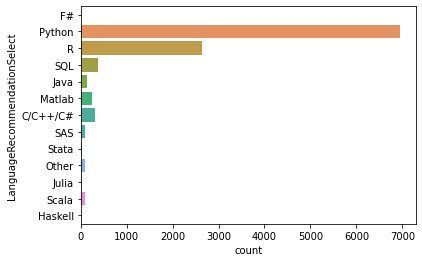

In [6]:
# 사용하는 언어에 대한 시각화
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

* 응답자의 대부분이 파이썬을 명확하게 선호하고 있는 것으로 보여진다.
* 전문가와 강사들이 선호하는 언어를 알아보도록 하자.

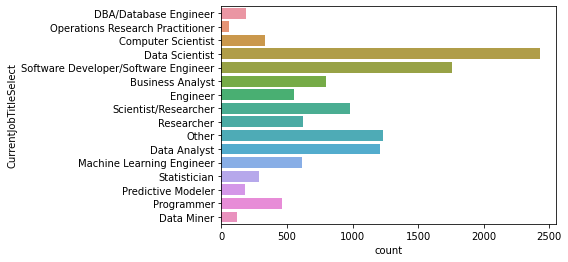

In [7]:
# 현재 하고 있는 일에 대한 시각화
sns.countplot(y=mcq['CurrentJobTitleSelect'])

* 데이터 사이언티스트(Data Scientist)가 가장 많으며 다음으로는 개발자 및 엔지니어(Software Developer/Software Engineer), 데이터 애널리스트(Data Analyst) 등이 있다.

In [8]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

In [9]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)

(7158, 228)


* 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
* 전체 응답자 11830명 중 Python과 R을 사용하는 사람은 7158명이다.

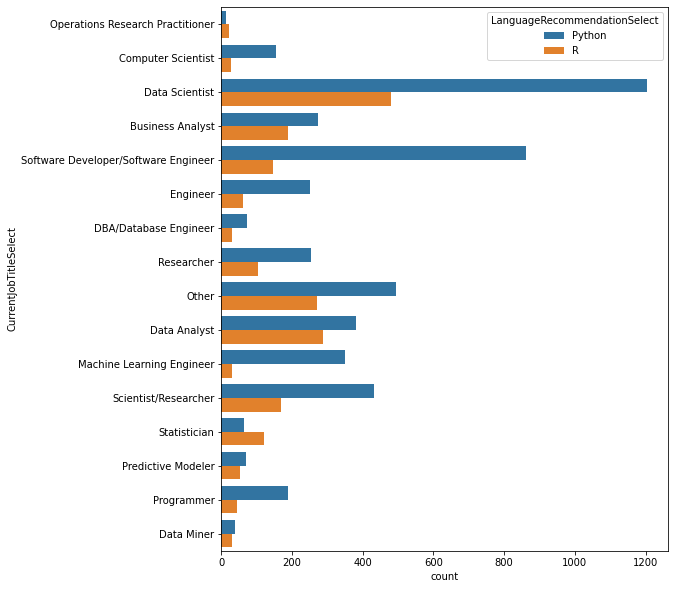

In [10]:
# 직업별 Python과 R 사용에 대한 시각화
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect', 
              data=data)

* 데이터 사이언티스트들(Data Scientist)은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 하지만 소프트웨어 개발자들(Software Developer/Software Engineer)은 Python을 훨씬 더 많이 사용한다.
* 대부분 Python을 더 선호하지만, Python보다 R을 더 많이 사용하는 직업군은 통계학자들(Statistician)과 운영과학 실무자들(Operations Research Practitioner)이다.

# **Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?**

## **1) 데이터 사이언스 툴**

In [11]:
# 다음 해에 주목할만한 데이터 사이언스(ML) 툴에 대한 응답수와 비율 확인
## 응답수에 대한 dataframe 생성
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
## 비율에 대한 dataframe 생성
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
## 응답수와 비율에 대한 dataframe을 merge
## 상위 20개의 데이터만 선택
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
## 컬럼의 순서대로 '응답 수', '비율'로 컬럼명 지정
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


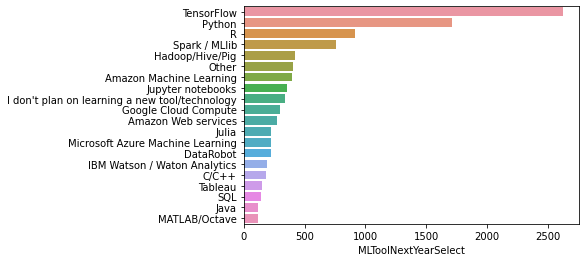

In [12]:
# 선호하는 데이터 사이언스(ML) 툴에 대한 시각화
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

* 다음 해에 가장 주목할만한 데이터 사이언스 툴은 TensorFlow였으며, 다음으로 Python, R, Spark / MLlib, Hadoop / Hive / Pig 등이 있다.
* 응답자들은 구글의 딥러닝 프레임워크인 TensorFlow가 24%로 가장 많은 관심을 받을 것이라 응답했다. 그리고 Python이 15%, R은 8%로 따르고 있다.
* 클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

## **2) 다음 해에 주목할 만한 Data Science Methods**

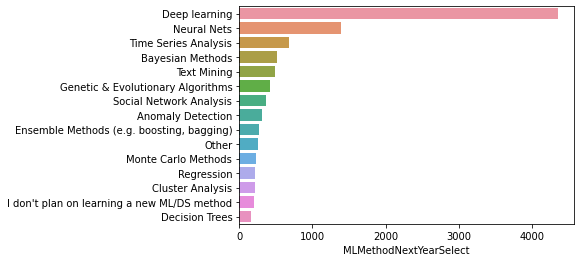

In [13]:
# 다음 해에 주목할 만한 데이터 사이언스 방법에 대한 시각화
## 상위 15개 데이터에 대해서만 시각화 진행
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

* 응답에 대한 통계를 보면 딥러닝(Deep learning)과 뉴럴네트워크(Neural Nets)가 엄청나게 인기가 있을 것임을 볼 수 있다. 다음으로 시계열 분석(Time Series Analysis), 베이지안 방법(Bayesian Methods), 텍스트 마이닝(Text Mining) 등의 내용이 있다. 중간쯤에 부스팅과 배깅 같은 앙상블 메소드(Ensemble Methods(e.g.boosting, bagging))도 있다.
* 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

# **Q3. 어디에서 데이터 사이언스를 배워야 할까요?**

In [14]:
# 데이터 사이언스 플랫폼에 대한 데이터 확인
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

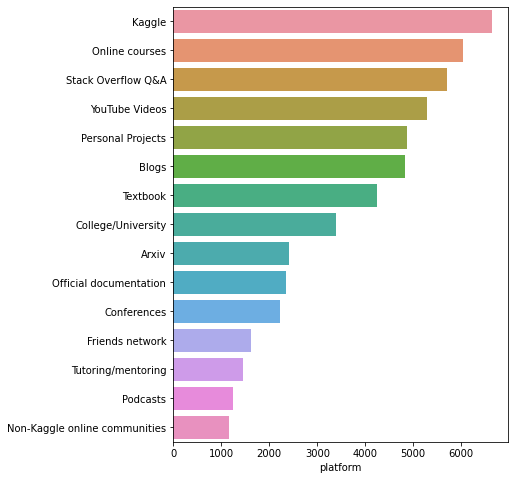

In [15]:
# 데이터 사이언스 플랫폼에 대한 시각화
## 결측값을 제외하고 상위 15개 데이터에 대해서만 시각화 진행
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

* 응답자들은 Kaggle을 가장 인기있는 학습 플랫폼으로 선택했다. 그러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있다.
* 온라인 코스(Online courses), 스택 오버플로(Stack Overflow Q&A) 및 유튜브(YouTube Videos) 등 상위 5개의 최우수 학습 플랫폼은 대학 학위(College/University)나 교과서(Textbook)보다 중요도가 높다.

In [16]:
# 설문내용과 응답대상 확인
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [17]:
# 유용한 column들 모음
## LearningCategory의 column들을 하나의 feature로 모아서 줌
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

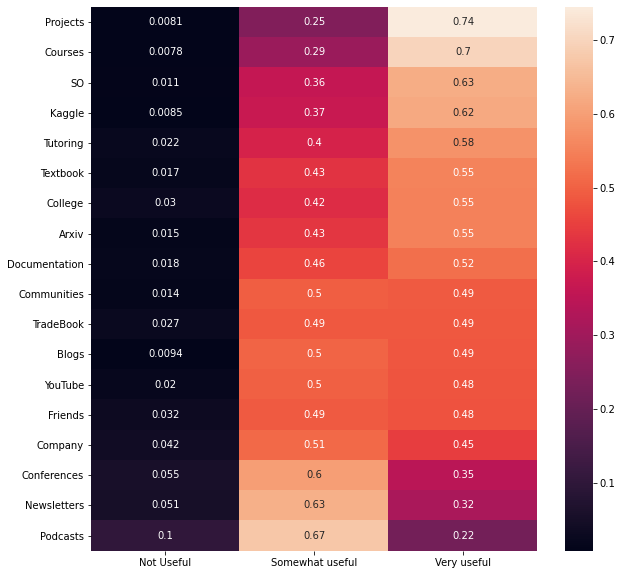

In [18]:
# 학습플랫폼과 유용함에 대한 연관성 확인
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계 시각화
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

* 1에 가까울수록 상관관계가 높다.
* 응답자들은 프로젝트(Projects)가 0.74로 가장 유용하다고 응답했고, 다음으로 코스를 수강하는 것(Courses), 스택오버플로우(SO), Kaggle 등이 있다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

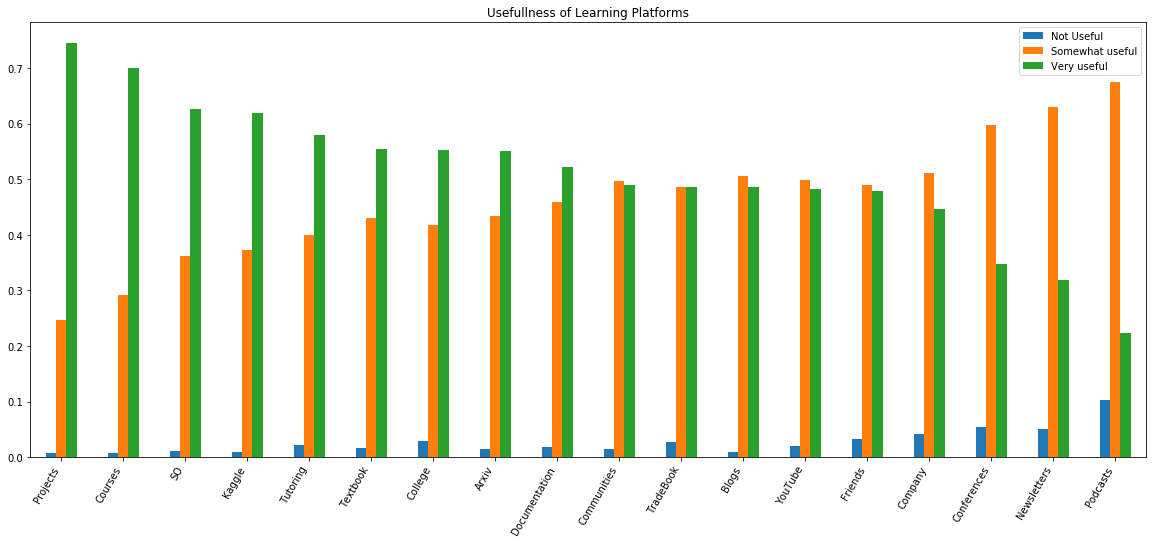

In [ ]:
# 유용함의 정도를 각 플랫폼별로 그룹화한 것에 대한 시각화
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

* 실제로 프로젝트를 해보는 것(Projects)에 대해 74.7%의 응답자가 매우 유용하다고 응답했다. 다음으로는 코스를 수강하는 것(Courses), 스택오버플로우(SO), Kaggle, 튜터링(Tutoring), 책(Textbook)이 도움이 많이되는 편이다. 팟캐스트(Podcasts)는 매우 유용하지 않지만 때때로 유용하다는 응답은 가장 많았다.

In [ ]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [ ]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

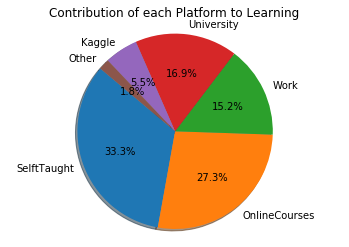

In [ ]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.

# **Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?**

In [ ]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [ ]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [ ]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [ ]:
s = s[s != 'nan']

In [ ]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장많고, 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음이고 적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음이다.

# **Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?**

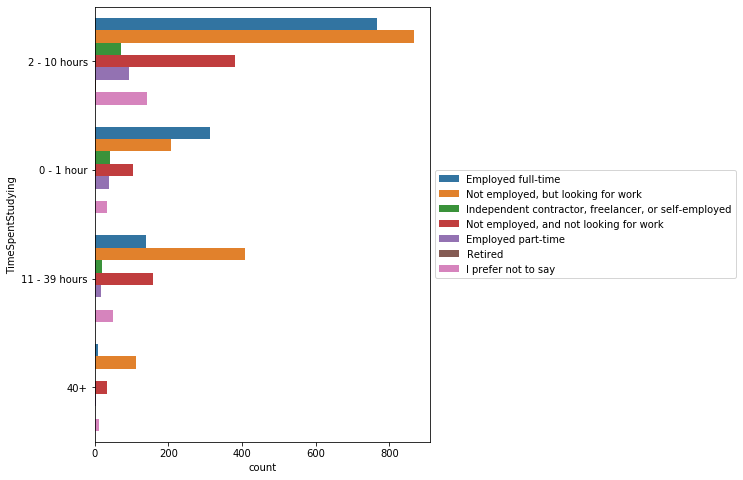

In [ ]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

In [ ]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


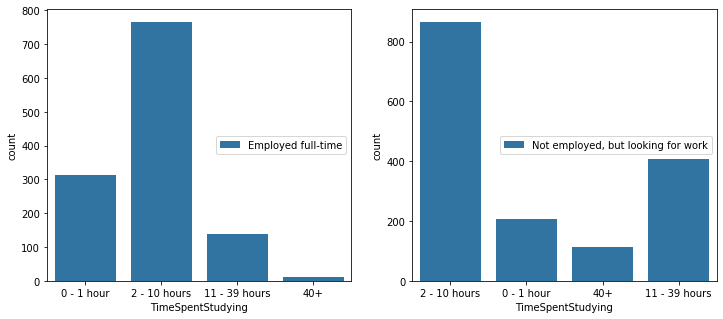

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))